     Rank                                             Major Degree Type  \
0       1                             Petroleum Engineering   Bachelors   
1       2      Operations Research & Industrial Engineering   Bachelors   
2       3  Electrical Engineering & Computer Science (EECS)   Bachelors   
3       4                                Interaction Design   Bachelors   
4       5                                  Building Science   Bachelors   
..    ...                                               ...         ...   
758   759                                    Equine Studies   Bachelors   
759   760                          Nonprofit Administration   Bachelors   
760   761                             Addictions Counseling   Bachelors   
761   762                         Early Childhood Education   Bachelors   
762   763                                     Metalsmithing   Bachelors   

    Early Career Pay Mid-Career Pay % High Meaning  
0            $98,100       $212,100           

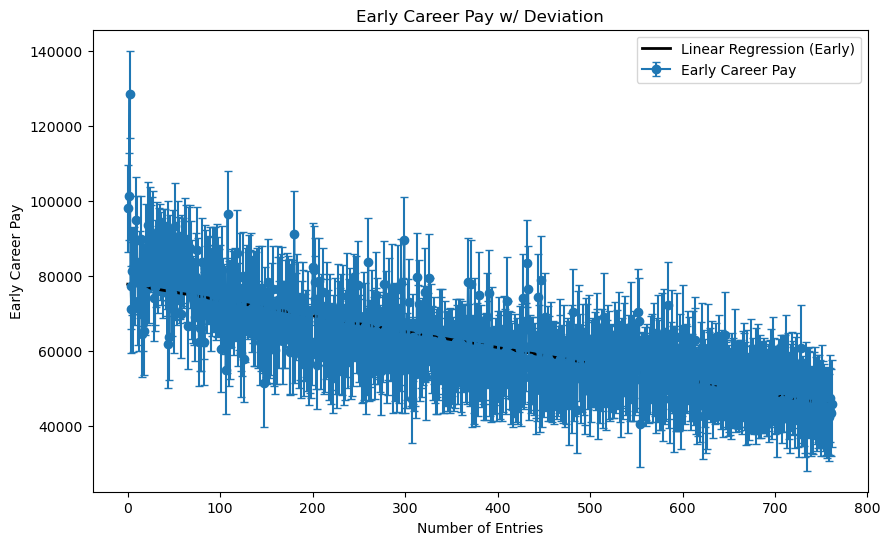

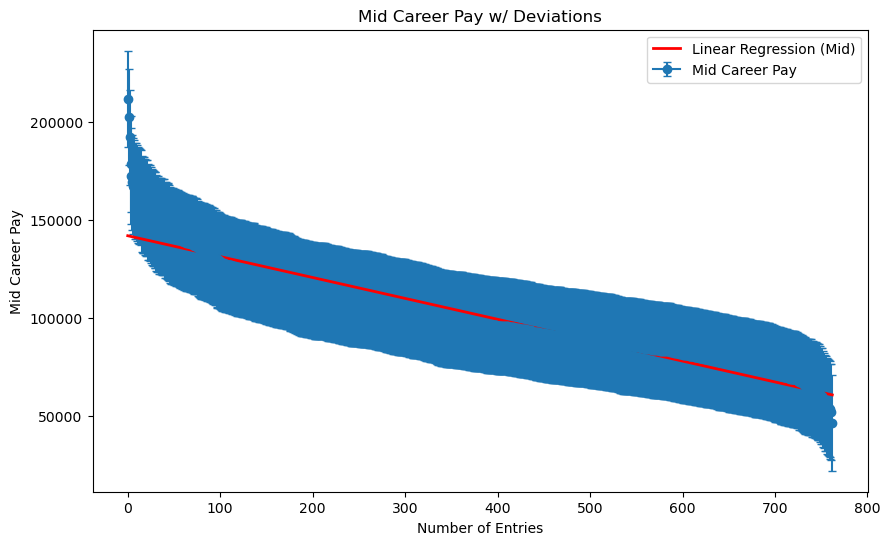

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

file = pd.read_csv("final-post-college-salaries.csv")
print(file)
#finding column names
file_preview = file.head

#turning the columns into only numbers
file['Early Career Pay'] = file['Early Career Pay'].replace(r'[|\$,]', '', regex=True)
file['Mid-Career Pay'] = file['Mid-Career Pay'].replace(r'[\$,]', '', regex=True)

#turning the columns into numeric data 
file['Early Career Pay'] = pd.to_numeric(file['Early Career Pay'],errors='coerce')
file['Mid-Career Pay']= pd.to_numeric(file['Mid-Career Pay'],errors='coerce')

#finding the data at the bottom and top 1%, and quartiles
early_quantiles = file['Early Career Pay'].quantile([0.01,0.25, 0.5, 0.75,0.99])
mid_quantiles = file['Mid-Career Pay'].quantile([0.01,0.25,0.50,0.75,0.99])
print(early_quantiles)
print(mid_quantiles)

early_set = file['Early Career Pay']
mid_set = file['Mid-Career Pay']
#print(mid_set)


def average_pay(early,mid):
    """function to find average pay"""
    avg_early = early.mean()
    avg_mid = mid.mean()
    return math.floor(avg_early),math.floor(avg_mid)

def std_pay(early,mid):
    """function to find std of data set"""
    std_early = early.std()
    std_mid = mid.std()
    return std_early, std_mid

avg_early,avg_mid = average_pay(early_set,mid_set)
std_early,std_mid = std_pay(early_set,mid_set)

#lin reg early career data setup
X_early = np.array(range(len(early_set))).reshape(-1,1)
y_early=early_set.values

model_early = LinearRegression()
model_early.fit(X_early,y_early)

y_early_pred = model_early.predict(X_early)

#lin reg mid career data setup
X_mid = np.array(range(len(mid_set))).reshape(-1,1)
y_mid=mid_set.values

model_mid = LinearRegression()
model_mid.fit(X_mid,y_mid)

y_mid_pred = model_mid.predict(X_mid)


#creating line plots for early career pay data
plt.figure(figsize=(10,6))
plt.errorbar(
    x=range(len(early_set)),
    y=early_set,
    yerr=std_early,
    fmt='-o',
    capsize=3,
    label='Early Career Pay',
)
plt.plot(range(len(early_set)),y_early_pred, color = 'black',label = 'Linear Regression (Early)', linewidth = 2)
plt.xlabel("Number of Entries")
plt.ylabel("Early Career Pay")
plt.title("Early Career Pay w/ Deviation")
plt.legend()
plt.show()

#creating line plot for mid career pay data 
plt.figure(figsize=(10,6))
plt.errorbar(
    x=range(len(mid_set)),
    y=mid_set,
    yerr=std_mid,
    fmt='-o',
    capsize=3,
    label='Mid Career Pay'
)
plt.plot(range(len(mid_set)),y_mid_pred,color = 'red', label = 'Linear Regression (Mid)',linewidth = 2)
plt.xlabel("Number of Entries")
plt.ylabel("Mid Career Pay")
plt.title("Mid Career Pay w/ Deviations")
plt.legend()
plt.show()



    
    
    
    